In [52]:
import os
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [53]:
load_dotenv()

True

In [54]:
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")

In [55]:
db_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(db_url)

In [56]:
query = "SELECT * FROM intel;"
df = pd.read_sql(query, engine)

In [57]:
print(df)

                                     produktsortiment prozessornummer  \
0       Intel® Core™ i7 Prozessoren der 8. Generation        i7-8700K   
1       Intel® Core™ i7 Prozessoren der 8. Generation         i7-8700   
2       Intel® Core™ i7 Prozessoren der 8. Generation        i7-8700T   
3      Intel® Core™ i7 Prozessoren der 12. Generation        i7-12700   
4      Intel® Core™ i7 Prozessoren der 12. Generation       i7-12700F   
5      Intel® Core™ i7 Prozessoren der 12. Generation       i7-12700K   
6      Intel® Core™ i7 Prozessoren der 12. Generation      i7-12700KF   
7      Intel® Core™ i7 Prozessoren der 12. Generation       i7-12700T   
8       Intel® Core™ i7 Prozessoren der 8. Generation         i7-8700   
9       Intel® Core™ i7 Prozessoren der 8. Generation        i7-8086K   
10      Intel® Core™ i7 Prozessoren der 9. Generation        i7-9700K   
11      Intel® Core™ i7 Prozessoren der 9. Generation       i7-9700KF   
12      Intel® Core™ i7 Prozessoren der 9. Generati

In [58]:
print(df.columns)

Index(['produktsortiment', 'prozessornummer', 'litographie_nm',
       'anzahl_der_kerne', 'gesamte_threads', 'max_turbo_taktfrequenz_GHz',
       'intel_turbo_boost_technik_2_0_taktfrequenz_GHz',
       'grundtaktfrequenz_des_prozessors_GHz', 'cache_MB',
       'bus_taktfrequenz_GT_per_s', 'verlustleistung_tdp_W',
       'x_of_performance_cores', 'x_of_efficiency_cores',
       'intel_turbo_boost_max_technology_3_0_frequency_GHz',
       'single_p_core_turbo_frequency_GHz',
       'single_e_core_turbo_frequency_GHz', 'p_core_base_frequency',
       'e_core_base_frequency_GHz', 'total_l2_cache_MB',
       'processor_base_power_W', 'maximum_turbo_power_W', 'einfuhrungsdatum',
       'expected_discontinuance', 'grundtaktfrequenz_der_grafik_MHz',
       'max_dynamische_grafikfrequenz_GHz', 'max_videospeicher_der_grafik_GB',
       'x4k_unterstutzung_at', 'max_auflosung_hdmi', 'max_auflosung_dp',
       'max_auflosung_e_dp_integrierter_flachbildschirm',
       'pci_express_konfigurationen'

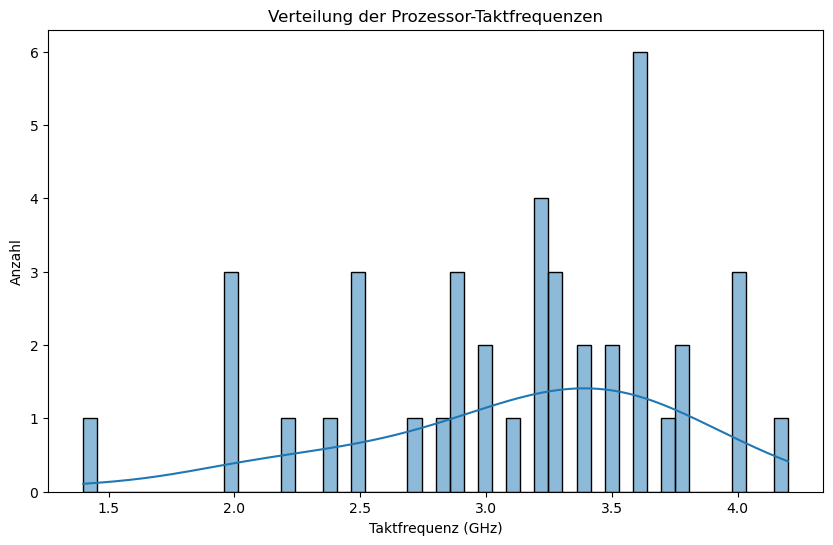

In [59]:
plt.figure(figsize=(10,6))
sn.histplot (df['grundtaktfrequenz_des_prozessors_GHz'], bins=50, kde=True)
plt.title("Verteilung der Prozessor-Taktfrequenzen")
plt.xlabel("Taktfrequenz (GHz)")
plt.ylabel("Anzahl")
plt.show()

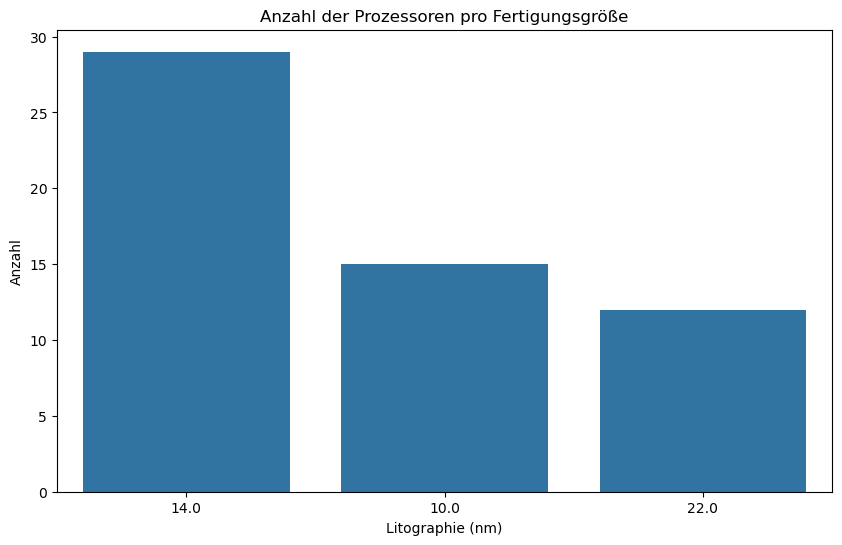

In [60]:
plt.figure(figsize=(10, 6))
sn.countplot(data=df, x='litographie_nm', order=df['litographie_nm'].value_counts().index)
plt.title("Anzahl der Prozessoren pro Fertigungsgröße")
plt.xlabel("Litographie (nm)")
plt.ylabel("Anzahl")
plt.show()

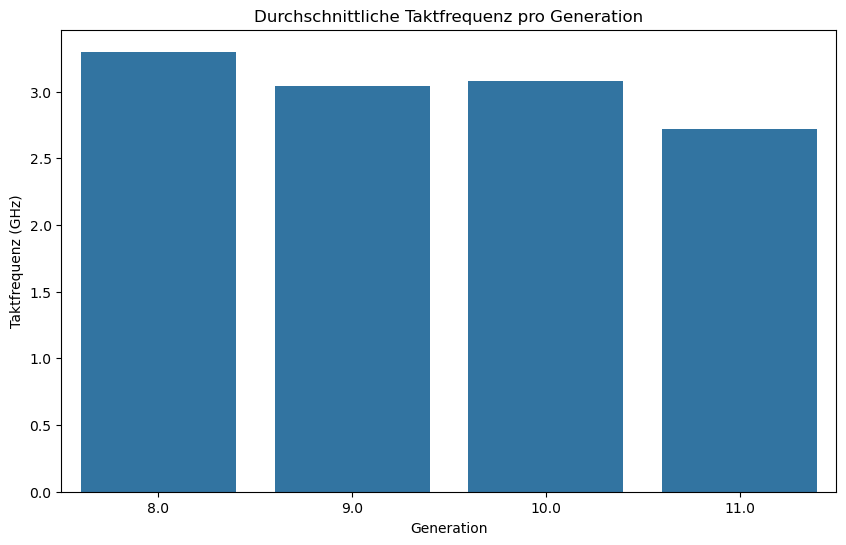

In [70]:
# Group by 'produktsortiment' and calculate the mean of 'grundtaktfrequenz_des_prozessors_GHz'
avg_clock_per_gen = df.groupby('produktsortiment')['grundtaktfrequenz_des_prozessors_GHz'].mean().reset_index()

# Extract the generation number from the 'produktsortiment' string
avg_clock_per_gen['generation'] = avg_clock_per_gen['produktsortiment'].str.extract(r'(\d+)\. Generation')

# Convert the 'generation' column to numeric type
avg_clock_per_gen['generation'] = pd.to_numeric(avg_clock_per_gen['generation'])

# Drop rows where 'grundtaktfrequenz_des_prozessors_GHz' is NaN
avg_clock_per_gen = avg_clock_per_gen.dropna(subset=['grundtaktfrequenz_des_prozessors_GHz'])

# Sort the DataFrame by the 'generation' column in ascending order
avg_clock_per_gen = avg_clock_per_gen.sort_values(by='generation')

# Plot the barplot
plt.figure(figsize=(10, 6))
sn.barplot(data=avg_clock_per_gen, x='generation', y='grundtaktfrequenz_des_prozessors_GHz')
plt.title("Durchschnittliche Taktfrequenz pro Generation")
plt.xlabel("Generation")
plt.ylabel("Taktfrequenz (GHz)")
plt.show()

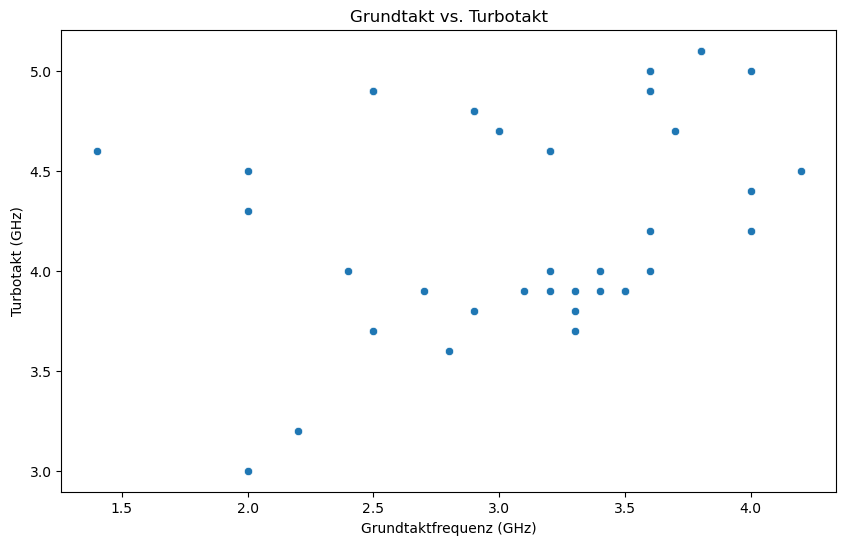

In [62]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='grundtaktfrequenz_des_prozessors_GHz', y='max_turbo_taktfrequenz_GHz')
plt.title("Grundtakt vs. Turbotakt")
plt.xlabel("Grundtaktfrequenz (GHz)")
plt.ylabel("Turbotakt (GHz)")
plt.show()